# Single Image calculation

In [13]:
import cv2
import mediapipe as mp

# Load the image
image_path = 'extract0001_jpg.rf.5cbed8dc6cd07b5f9f62b4e22d23745f.jpg'
image = cv2.imread(image_path)
image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

# Initialize Mediapipe Pose model
mp_pose = mp.solutions.pose
pose = mp_pose.Pose(static_image_mode=False, min_detection_confidence=0.5, min_tracking_confidence=0.5)

# Process the image to detect poses
results = pose.process(image_rgb)

# Draw poses on the image
if results.pose_landmarks:
    mp_drawing = mp.solutions.drawing_utils
    annotated_image = image.copy()
    mp_drawing.draw_landmarks(annotated_image, results.pose_landmarks, mp_pose.POSE_CONNECTIONS)

# Resize the image to reduce the output window size
scale_percent = 50  # adjust this value as needed
width = int(annotated_image.shape[1] * scale_percent / 100)
height = int(annotated_image.shape[0] * scale_percent / 100)
resized_image = cv2.resize(annotated_image, (width, height))

# Display the resized image
cv2.imshow('Resized Image with Poses', resized_image)
cv2.waitKey(0)
cv2.destroyAllWindows()


In [8]:
from PIL import Image

img = Image.open(image)
img.show()

AttributeError: 'mediapipe.python._framework_bindings.image.Image' object has no attribute 'read'

# Making dataframe from images 

## not normalized

In [5]:
import os
import cv2
import mediapipe as mp
import pandas as pd
import numpy as np

# Initialize MediaPipe
mp_drawing = mp.solutions.drawing_utils
mp_pose = mp.solutions.pose

# Define function to calculate Euclidean distance
def euclidean_distance(point1, point2):
    return np.sqrt((point1[0] - point2[0]) ** 2 + (point1[1] - point2[1]) ** 2)

# Define function to calculate midpoint
def calc_midpoint(point1, point2):
    return [(point1[0] + point2[0]) / 2, (point1[1] + point2[1]) / 2]

# Define function to process an image and calculate distances
def process_image(image_path):
    image = cv2.imread(image_path)
    if image is None:
        return None
    
    # Convert the image to RGB
    image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    
    with mp_pose.Pose(static_image_mode=True, min_detection_confidence=0.5) as pose:
        results = pose.process(image_rgb)
        
        if results.pose_landmarks:
            landmarks = results.pose_landmarks.landmark
            
            # Get coordinates
            nose = [landmarks[mp_pose.PoseLandmark.NOSE.value].x, landmarks[mp_pose.PoseLandmark.NOSE.value].y]
            left_shoulder = [landmarks[mp_pose.PoseLandmark.LEFT_SHOULDER.value].x, landmarks[mp_pose.PoseLandmark.LEFT_SHOULDER.value].y]
            left_ear = [landmarks[mp_pose.PoseLandmark.LEFT_EAR.value].x, landmarks[mp_pose.PoseLandmark.LEFT_EAR.value].y]
            right_shoulder = [landmarks[mp_pose.PoseLandmark.RIGHT_SHOULDER.value].x, landmarks[mp_pose.PoseLandmark.RIGHT_SHOULDER.value].y]
            right_ear = [landmarks[mp_pose.PoseLandmark.RIGHT_EAR.value].x, landmarks[mp_pose.PoseLandmark.RIGHT_EAR.value].y]
            
            # Calculate distances
            dist1 = euclidean_distance(left_ear, left_shoulder)
            dist2 = euclidean_distance(right_ear, right_shoulder)
            
            # Calculate midpoint and distance between midpoints for left side
            midpoint1 = calc_midpoint(left_ear, left_shoulder)
            dist_midpoint1 = euclidean_distance(left_ear, left_shoulder)
            
            # Calculate midpoint and distance between midpoints for right side
            midpoint2 = calc_midpoint(right_ear, right_shoulder)
            dist_midpoint2 = euclidean_distance(right_ear, right_shoulder)
            
            # Calculate midpoint and distance between midpoint and nose
            shoulder_midpoint = calc_midpoint(midpoint1, midpoint2)
            dist_shoulder_nose = euclidean_distance(shoulder_midpoint, nose)
            
            return {
                'dist_left_ear_shoulder': dist1,
                'dist_right_ear_shoulder': dist2,
                'dist_shoulder_nose': dist_shoulder_nose
            }
    return None

# Path to the dataset
dataset_path = r'C:\Users\hp\Desktop\FDV\final project\data'
categories = os.listdir(dataset_path)

# Initialize DataFrame
data = []

# Process each category (i.e., class)
for category in categories:
    category_path = os.path.join(dataset_path, category)
    if os.path.isdir(category_path):
        # Process each image in the category folder
        for image_name in os.listdir(category_path):
            image_path = os.path.join(category_path, image_name)
            distances = process_image(image_path)
            if distances is not None:
                distances['class'] = category
                data.append(distances)

# Create DataFrame
df = pd.DataFrame(data)

# Save DataFrame to CSV
df.to_csv('distances.csv', index=False)

print("Processing complete. Distances saved to distances.csv")


Processing complete. Distances saved to distances.csv


## Normalized to 720p and only distances

In [1]:
import os
import cv2
import mediapipe as mp
import pandas as pd
import numpy as np

# Initialize MediaPipe
mp_drawing = mp.solutions.drawing_utils
mp_pose = mp.solutions.pose

# Define function to calculate Euclidean distance
def euclidean_distance(point1, point2):
    return np.sqrt((point1[0] - point2[0]) ** 2 + (point1[1] - point2[1]) ** 2)

# Define function to calculate midpoint
def calc_midpoint(point1, point2):
    return [(point1[0] + point2[0]) / 2, (point1[1] + point2[1]) / 2]

# Define function to process an image and calculate distances
def process_image(image_path):
    image = cv2.imread(image_path)
    if image is None:
        return None
    
    # Resize the image to 1280x720 pixels
    image_resized = cv2.resize(image, (1280, 720))
    
    # Convert the image to RGB
    image_rgb = cv2.cvtColor(image_resized, cv2.COLOR_BGR2RGB)
    
    with mp_pose.Pose(static_image_mode=True, min_detection_confidence=0.5) as pose:
        results = pose.process(image_rgb)
        
        if results.pose_landmarks:
            landmarks = results.pose_landmarks.landmark
            
            # Get coordinates
            nose = [landmarks[mp_pose.PoseLandmark.NOSE.value].x, landmarks[mp_pose.PoseLandmark.NOSE.value].y]
            left_shoulder = [landmarks[mp_pose.PoseLandmark.LEFT_SHOULDER.value].x, landmarks[mp_pose.PoseLandmark.LEFT_SHOULDER.value].y]
            left_ear = [landmarks[mp_pose.PoseLandmark.LEFT_EAR.value].x, landmarks[mp_pose.PoseLandmark.LEFT_EAR.value].y]
            right_shoulder = [landmarks[mp_pose.PoseLandmark.RIGHT_SHOULDER.value].x, landmarks[mp_pose.PoseLandmark.RIGHT_SHOULDER.value].y]
            right_ear = [landmarks[mp_pose.PoseLandmark.RIGHT_EAR.value].x, landmarks[mp_pose.PoseLandmark.RIGHT_EAR.value].y]
            
            # Calculate distances
            dist1 = euclidean_distance(left_ear, left_shoulder)
            dist2 = euclidean_distance(right_ear, right_shoulder)
            
            # Calculate midpoint and distance between midpoints for left side
            midpoint1 = calc_midpoint(left_ear, left_shoulder)
            dist_midpoint1 = euclidean_distance(left_ear, left_shoulder)
            
            # Calculate midpoint and distance between midpoints for right side
            midpoint2 = calc_midpoint(right_ear, right_shoulder)
            dist_midpoint2 = euclidean_distance(right_ear, right_shoulder)
            
            # Calculate midpoint and distance between midpoint and nose
            shoulder_midpoint = calc_midpoint(midpoint1, midpoint2)
            dist_shoulder_nose = euclidean_distance(shoulder_midpoint, nose)
            
            return {
                'dist_left_ear_shoulder': dist1,
                'dist_right_ear_shoulder': dist2,
                'dist_shoulder_nose': dist_shoulder_nose
            }
    return None

# Path to the dataset
dataset_path = r'C:\Users\hp\Desktop\FDV\final project\data'
categories = os.listdir(dataset_path)

# Initialize DataFrame
data = []

# Process each category (i.e., class)
for category in categories:
    category_path = os.path.join(dataset_path, category)
    if os.path.isdir(category_path):
        # Process each image in the category folder
        for image_name in os.listdir(category_path):
            image_path = os.path.join(category_path, image_name)
            distances = process_image(image_path)
            if distances is not None:
                distances['class'] = category
                data.append(distances)

# Create DataFrame
df = pd.DataFrame(data)

# Save DataFrame to CSV
df.to_csv('distances720p.csv', index=False)

print("Processing complete. Distances saved to distances.csv")


Processing complete. Distances saved to distances.csv


## Normalized all and calculated for all angles and distances

In [1]:
import os
import cv2
import mediapipe as mp
import pandas as pd
import numpy as np

# Initialize MediaPipe
mp_drawing = mp.solutions.drawing_utils
mp_pose = mp.solutions.pose

# Define function to calculate Euclidean distance
def euclidean_distance(point1, point2):
    return np.sqrt((point1[0] - point2[0]) ** 2 + (point1[1] - point2[1]) ** 2)

# Define function to calculate midpoint
def calc_midpoint(point1, point2):
    return [(point1[0] + point2[0]) / 2, (point1[1] + point2[1]) / 2]

# Define function to calculate angle between three points (in degrees)
def calc_angle(pointA, pointB, pointC):
    # Create vectors AB and BC
    AB = np.array(pointB) - np.array(pointA)
    BC = np.array(pointB) - np.array(pointC)
    
    # Calculate the dot product and magnitudes of the vectors
    dot_product = np.dot(AB, BC)
    magnitude_AB = np.linalg.norm(AB)
    magnitude_BC = np.linalg.norm(BC)
    
    # Calculate the cosine of the angle using the dot product formula
    cos_angle = dot_product / (magnitude_AB * magnitude_BC)
    
    # Calculate the angle in radians and then convert to degrees
    angle = np.arccos(cos_angle)
    angle_degrees = np.degrees(angle)
    
    return angle_degrees

# Define function to process an image and calculate distances and angles
def process_image(image_path):
    image = cv2.imread(image_path)
    if image is None:
        return None
    
    # Resize the image to 1280x720 pixels
    image_resized = cv2.resize(image, (1280, 720))
    
    # Convert the image to RGB
    image_rgb = cv2.cvtColor(image_resized, cv2.COLOR_BGR2RGB)
    
    with mp_pose.Pose(static_image_mode=True, min_detection_confidence=0.5) as pose:
        results = pose.process(image_rgb)
        
        if results.pose_landmarks:
            landmarks = results.pose_landmarks.landmark
            
            # Get coordinates
            nose = [landmarks[mp_pose.PoseLandmark.NOSE.value].x, landmarks[mp_pose.PoseLandmark.NOSE.value].y]
            left_shoulder = [landmarks[mp_pose.PoseLandmark.LEFT_SHOULDER.value].x, landmarks[mp_pose.PoseLandmark.LEFT_SHOULDER.value].y]
            left_ear = [landmarks[mp_pose.PoseLandmark.LEFT_EAR.value].x, landmarks[mp_pose.PoseLandmark.LEFT_EAR.value].y]
            right_shoulder = [landmarks[mp_pose.PoseLandmark.RIGHT_SHOULDER.value].x, landmarks[mp_pose.PoseLandmark.RIGHT_SHOULDER.value].y]
            right_ear = [landmarks[mp_pose.PoseLandmark.RIGHT_EAR.value].x, landmarks[mp_pose.PoseLandmark.RIGHT_EAR.value].y]
            
            # Calculate distances
            dist_left_ear_shoulder = euclidean_distance(left_ear, left_shoulder)
            dist_right_ear_shoulder = euclidean_distance(right_ear, right_shoulder)
            shoulder_midpoint = calc_midpoint(left_shoulder, right_shoulder)
            dist_shoulder_nose = euclidean_distance(shoulder_midpoint, nose)
            
            # Calculate angles
            angle_right_ear_left_shoulder = calc_angle(right_ear, nose, left_shoulder)
            angle_left_ear_right_shoulder = calc_angle(left_ear, nose, right_shoulder)
            angle_nose_left_shoulder_right_shoulder = calc_angle(nose, left_shoulder, right_shoulder)
            
            return {
                'dist_left_ear_shoulder': dist_left_ear_shoulder,
                'dist_right_ear_shoulder': dist_right_ear_shoulder,
                'dist_shoulder_nose': dist_shoulder_nose,
                'angle_right_ear_left_shoulder': angle_right_ear_left_shoulder,
                'angle_left_ear_right_shoulder': angle_left_ear_right_shoulder,
                'angle_nose_left_shoulder_right_shoulder': angle_nose_left_shoulder_right_shoulder
            }
    return None

# Path to the dataset
dataset_path = r'C:\Users\hp\Desktop\FDV\final project\data'
categories = os.listdir(dataset_path)

# Initialize DataFrame
data = []

# Process each category (i.e., class)
for category in categories:
    category_path = os.path.join(dataset_path, category)
    if os.path.isdir(category_path):
        # Process each image in the category folder
        for image_name in os.listdir(category_path):
            image_path = os.path.join(category_path, image_name)
            distances_angles = process_image(image_path)
            if distances_angles is not None:
                distances_angles['class'] = category
                data.append(distances_angles)

# Create DataFrame
df = pd.DataFrame(data)

# Save DataFrame to CSV
df.to_csv('d&a720p.csv', index=False)

print("Processing complete. Distances and angles saved to d&a720p.csv")



Processing complete. Distances and angles saved to d&a720p.csv


# Checking the dataframe

In [2]:
import pandas as pd
df1= pd.read_csv('distances.csv')
df2= pd.read_csv('distances720p.csv')
df= pd.read_csv('d&a720p.csv')

In [3]:
df.head()

,dist_left_ear_shoulder,dist_right_ear_shoulder,dist_shoulder_nose,angle_right_ear_left_shoulder,angle_left_ear_right_shoulder,angle_nose_left_shoulder_right_shoulder,class
0,0.406014,0.366057,0.339777,132.613727,142.517720,54.173919,looks good
1,0.396291,0.378735,0.368228,110.847407,126.913825,62.189427,looks good
2,0.388994,0.390084,0.366477,114.835318,128.574101,64.146226,looks good
3,0.412523,0.375311,0.346405,133.607664,142.050794,54.530092,looks good
4,0.389295,0.371843,0.356220,112.792044,136.044076,63.523938,looks good


In [4]:
df1.head()

,dist_left_ear_shoulder,dist_right_ear_shoulder,dist_shoulder_nose,class
0,0.407351,0.386890,0.163316,looks good
1,0.376321,0.361742,0.156809,looks good
2,0.310170,0.321227,0.077766,looks good
3,0.386454,0.371440,0.163250,looks good
4,0.402035,0.370342,0.161379,looks good


In [5]:
df2.head()

,dist_left_ear_shoulder,dist_right_ear_shoulder,dist_shoulder_nose,class
0,0.406014,0.366057,0.158349,looks good
1,0.396291,0.378735,0.184054,looks good
2,0.388994,0.390084,0.181476,looks good
3,0.412523,0.375311,0.161365,looks good
4,0.389295,0.371843,0.175464,looks good


In [6]:
df.describe()

,dist_left_ear_shoulder,dist_right_ear_shoulder,dist_shoulder_nose,angle_right_ear_left_shoulder,angle_left_ear_right_shoulder,angle_nose_left_shoulder_right_shoulder
count,5033.000000,5033.000000,5033.000000,5033.000000,5033.000000,5033.000000
mean,0.371893,0.376761,0.324924,134.318443,133.548073,57.644135
std,0.103298,0.106649,0.113711,27.399266,25.946578,13.843421
min,0.003687,0.047137,0.002842,0.906282,9.763519,0.033331
25%,0.277103,0.303664,0.229710,116.143407,120.269389,52.936903
50%,0.391818,0.380292,0.351909,137.250010,132.582227,59.849752
75%,0.437602,0.453690,0.419189,154.102504,152.744089,65.342963
max,0.693497,0.699253,0.592848,179.933044,179.981854,109.523406


In [7]:
df1.describe()


,dist_left_ear_shoulder,dist_right_ear_shoulder,dist_shoulder_nose
count,4658.000000,4658.000000,4658.000000
mean,0.427320,0.431572,0.181393
std,0.075929,0.077738,0.041713
min,0.148459,0.142539,0.003605
25%,0.383386,0.384720,0.161719
50%,0.424903,0.433191,0.188271
75%,0.476648,0.479317,0.208211
max,0.661066,0.669330,0.292426


In [8]:
df2.describe()

,dist_left_ear_shoulder,dist_right_ear_shoulder,dist_shoulder_nose
count,5033.000000,5033.000000,5033.000000
mean,0.371893,0.376761,0.152306
std,0.103298,0.106649,0.062568
min,0.003687,0.047137,0.001797
25%,0.277103,0.303664,0.100476
50%,0.391818,0.380292,0.161799
75%,0.437602,0.453690,0.203876
max,0.693497,0.699253,0.308588


# Encoding Y

In [9]:
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
df1['class_encoded'] = label_encoder.fit_transform(df1['class'])
df2['class_encoded'] = label_encoder.fit_transform(df2['class'])
df['class_encoded'] = label_encoder.fit_transform(df['class'])

                                         dist_left_ear_shoulder  \
dist_left_ear_shoulder                                 1.000000   
dist_right_ear_shoulder                                0.796761   
dist_shoulder_nose                                     0.889113   
angle_right_ear_left_shoulder                         -0.359363   
angle_left_ear_right_shoulder                         -0.084581   
angle_nose_left_shoulder_right_shoulder                0.362441   
class_encoded                                         -0.184864   

                                         dist_right_ear_shoulder  \
dist_left_ear_shoulder                                  0.796761   
dist_right_ear_shoulder                                 1.000000   
dist_shoulder_nose                                      0.870197   
angle_right_ear_left_shoulder                          -0.172088   
angle_left_ear_right_shoulder                          -0.248405   
angle_nose_left_shoulder_right_shoulder                

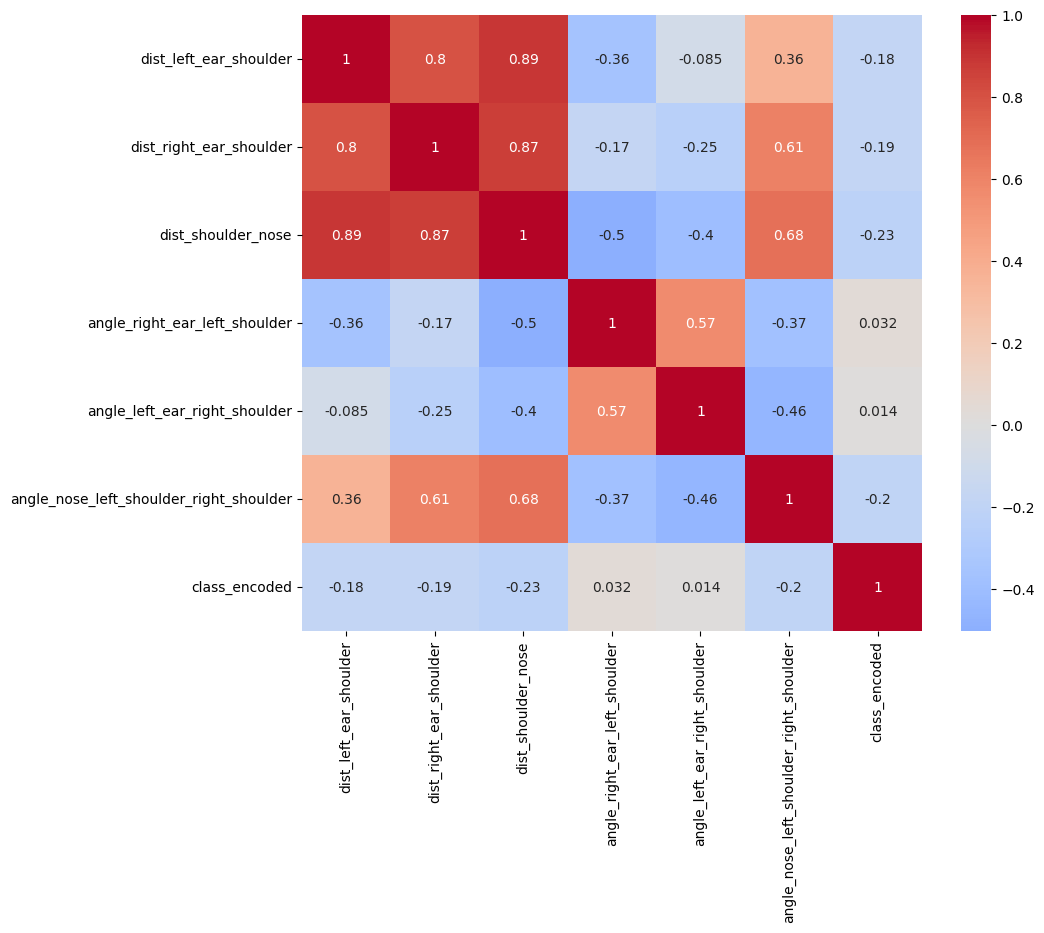

In [10]:
import seaborn as sns
import matplotlib.pyplot as plt

selected_columns = ['dist_left_ear_shoulder','dist_right_ear_shoulder','dist_shoulder_nose','angle_right_ear_left_shoulder','angle_left_ear_right_shoulder','angle_nose_left_shoulder_right_shoulder','class_encoded']
df_selected = df[selected_columns]
correlation_matrix = df_selected.corr()

# Print the correlation matrix
print(correlation_matrix)

# Set up the matplotlib figure
plt.figure(figsize=(10, 8))

# Draw the heatmap with the correlation matrix
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0)

# Display the plot
plt.show()

# Applying ML models

## SVC

Accuracy: 0.6216484607745779
Classification Report:
              precision    recall  f1-score   support

           0       0.57      0.90      0.70       377
           1       0.75      0.62      0.68       332
           2       0.59      0.27      0.37       298

    accuracy                           0.62      1007
   macro avg       0.64      0.60      0.58      1007
weighted avg       0.64      0.62      0.59      1007



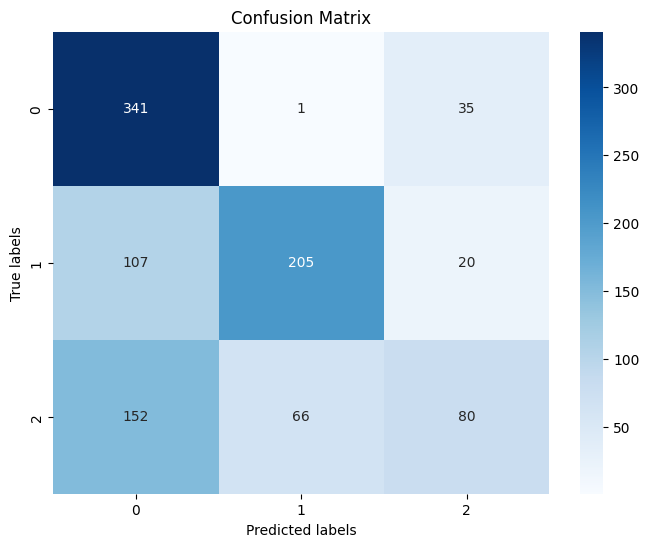

In [11]:
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report
from sklearn.metrics import confusion_matrix

X = df[['dist_left_ear_shoulder','dist_right_ear_shoulder','dist_shoulder_nose','angle_nose_left_shoulder_right_shoulder']]
y = df['class_encoded']

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create an SVM classifier
svm_classifier = SVC(kernel='linear', C=1.0, random_state=42)

# Train the classifier
svm_classifier.fit(X_train, y_train)

# Predict on the test set
y_pred = svm_classifier.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Display classification report
print("Classification Report:")
print(classification_report(y_test, y_pred))

# Generate confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Display confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, cmap='Blues', fmt='d')
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
plt.show()


In [11]:
y_pred = svm_classifier.predict(X_train)
accuracy = accuracy_score(y_train, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.5901639344262295


## Random Forest Classifier

Accuracy: 0.8987090367428004
Classification Report:
              precision    recall  f1-score   support

           0       0.95      0.95      0.95       377
           1       0.85      0.89      0.87       332
           2       0.89      0.83      0.86       298

    accuracy                           0.90      1007
   macro avg       0.90      0.89      0.89      1007
weighted avg       0.90      0.90      0.90      1007



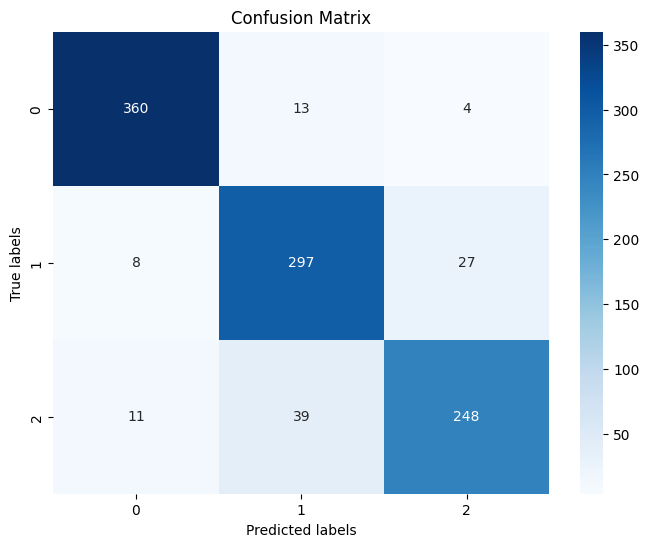

In [13]:
from sklearn.ensemble import RandomForestClassifier

# Load the dataset
# Assuming df contains your dataset
X = df[['dist_left_ear_shoulder','dist_right_ear_shoulder','dist_shoulder_nose','angle_nose_left_shoulder_right_shoulder']]
y = df['class_encoded']

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a Random Forest classifier
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)

# Train the classifier
rf_classifier.fit(X_train, y_train)

# Predict on the test set
y_pred = rf_classifier.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Display classification report
print("Classification Report:")
print(classification_report(y_test, y_pred))

# Generate confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Display confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, cmap='Blues', fmt='d')
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
plt.show()


In [14]:
y_pred = rf_classifier.predict(X_train)
accuracy = accuracy_score(y_train, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.9997516145057128


## Gradient Boosting

Accuracy: 0.8599801390268124
Classification Report:
              precision    recall  f1-score   support

           0       0.85      0.96      0.90       377
           1       0.84      0.86      0.85       332
           2       0.91      0.73      0.81       298

    accuracy                           0.86      1007
   macro avg       0.87      0.85      0.85      1007
weighted avg       0.86      0.86      0.86      1007



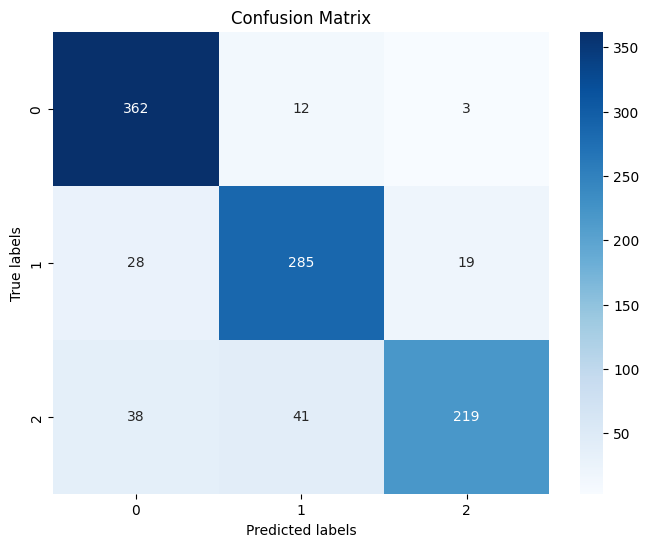

In [15]:
from sklearn.ensemble import GradientBoostingClassifier

# Load the dataset
# Assuming df contains your dataset
X = df[['dist_left_ear_shoulder','dist_right_ear_shoulder','dist_shoulder_nose','angle_nose_left_shoulder_right_shoulder']]
y = df['class_encoded']

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a Gradient Boosting classifier
gb_classifier = GradientBoostingClassifier(n_estimators=100, learning_rate=0.1, random_state=42)

# Train the classifier
gb_classifier.fit(X_train, y_train)

# Predict on the test set
y_pred = gb_classifier.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Display classification report
print("Classification Report:")
print(classification_report(y_test, y_pred))

# Generate confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Display confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, cmap='Blues', fmt='d')
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
plt.show()


In [16]:
y_pred = gb_classifier.predict(X_train)
accuracy = accuracy_score(y_train, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.8879781420765027


In [17]:
import pickle

with open('GBall.pkl', 'wb') as f:
    pickle.dump(gb_classifier, f)

## K nearest neighbour classifier

Accuracy: 0.6742800397219464
Classification Report:
              precision    recall  f1-score   support

           0       0.68      0.90      0.78       377
           1       0.69      0.62      0.65       332
           2       0.64      0.45      0.53       298

    accuracy                           0.67      1007
   macro avg       0.67      0.66      0.65      1007
weighted avg       0.67      0.67      0.66      1007



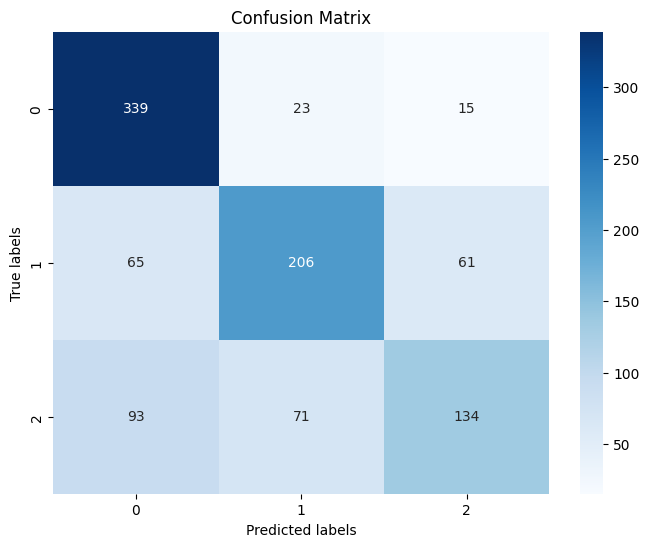

In [25]:
from sklearn.neighbors import KNeighborsClassifier

# Load the dataset
# Assuming df contains your dataset
X = df[['dist_left_ear_shoulder','dist_right_ear_shoulder','dist_shoulder_nose','angle_nose_left_shoulder_right_shoulder']]
y = df['class_encoded']

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a K-Nearest Neighbors classifier
knn_classifier = KNeighborsClassifier(n_neighbors=5)

# Train the classifier
knn_classifier.fit(X_train, y_train)

# Predict on the test set
y_pred = knn_classifier.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Display classification report
print("Classification Report:")
print(classification_report(y_test, y_pred))

# Generate confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Display confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, cmap='Blues', fmt='d')
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
plt.show()


In [19]:
y_pred = knn_classifier.predict(X_train)
accuracy = accuracy_score(y_train, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.7647789369100845


In [23]:
import pickle

with open('KNNall.pkl', 'wb') as f:
    pickle.dump(knn_classifier, f)


## Decision Tree classifier

Accuracy: 0.8599801390268124
Classification Report:
              precision    recall  f1-score   support

           0       0.93      0.89      0.91       377
           1       0.83      0.86      0.84       332
           2       0.81      0.83      0.82       298

    accuracy                           0.86      1007
   macro avg       0.86      0.86      0.86      1007
weighted avg       0.86      0.86      0.86      1007



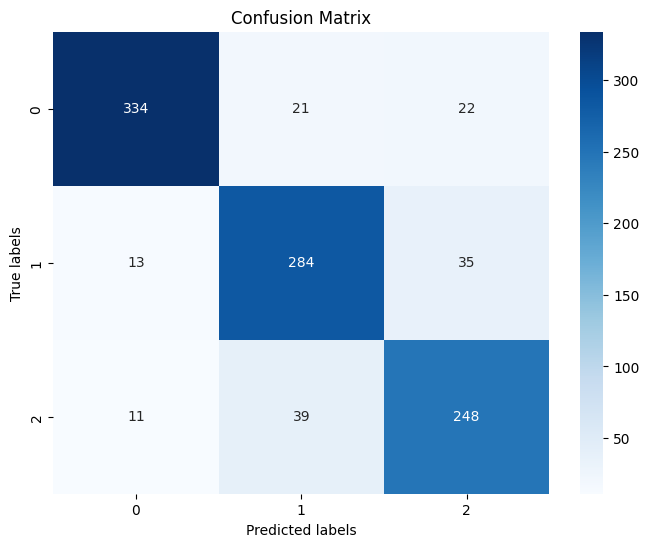

In [20]:
from sklearn.tree import DecisionTreeClassifier

# Load the dataset
# Assuming df contains your dataset
X = df[['dist_left_ear_shoulder','dist_right_ear_shoulder','dist_shoulder_nose','angle_nose_left_shoulder_right_shoulder']]
y = df['class_encoded']

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a Decision Tree classifier
dt_classifier = DecisionTreeClassifier(random_state=42)

# Train the classifier
dt_classifier.fit(X_train, y_train)

# Predict on the test set
y_pred = dt_classifier.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Display classification report
print("Classification Report:")
print(classification_report(y_test, y_pred))

# Generate confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Display confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, cmap='Blues', fmt='d')
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
plt.show()


In [21]:
y_pred = dt_classifier.predict(X_train)
accuracy = accuracy_score(y_train, y_pred)
print("Accuracy:", accuracy)


Accuracy: 1.0


### Using smote and imputer

In [28]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler,RobustScaler
robustscaler = RobustScaler()
X1 = robustscaler.fit_transform(X)

In [29]:
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer, KNNImputer
num_features = X.select_dtypes(exclude="object").columns

# Fit the KNN imputer with selected K-value
knn_pipeline = Pipeline(steps=[
    ('imputer', KNNImputer(n_neighbors=3)),
    ('RobustScaler', RobustScaler())
])

In [30]:
X = df2[['dist_left_ear_shoulder','dist_right_ear_shoulder','dist_shoulder_nose']]
y = df2['class_encoded']

In [31]:
X_knn =knn_pipeline.fit_transform(X)

In [32]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score
from statistics import mean
results=[]
# define imputer
imputer = KNNImputer(n_neighbors=5, weights='uniform', metric='nan_euclidean')
strategies = [str(i) for i in [1,3,5,7,9]]
for s in strategies:
    pipeline = Pipeline(steps=[('i', KNNImputer(n_neighbors=int(s))), ('m', LogisticRegression())])
    scores = cross_val_score(pipeline, X1, y, scoring='accuracy', cv=2, n_jobs=-1)
    results.append(scores)
    print('n_neighbors= %s || accuracy (%.4f)' % (s , mean(scores)))

n_neighbors= 1 || accuracy (0.4351)
n_neighbors= 3 || accuracy (0.4351)
n_neighbors= 5 || accuracy (0.4351)
n_neighbors= 7 || accuracy (0.4351)
n_neighbors= 9 || accuracy (0.4351)


In [33]:
from imblearn.combine import SMOTETomek

# Resampling the minority class. The strategy can be changed as required.
smt = SMOTETomek(random_state=42,sampling_strategy='minority',n_jobs=-1)
# Fit the model to generate the data.
X_res, y_res = smt.fit_resample(X_knn, y)

C:\Users\hp\anaconda3\envs\mp\lib\site-packages\imblearn\over_sampling\_smote\base.py:363: FutureWarning: The parameter `n_jobs` has been deprecated in 0.10 and will be removed in 0.12. You can pass an nearest neighbors estimator where `n_jobs` is already set instead.
  warnings.warn(


Accuracy: 0.8808341608738828
Classification Report:
              precision    recall  f1-score   support

           0       0.90      0.95      0.92       377
           1       0.85      0.87      0.86       332
           2       0.89      0.80      0.84       298

    accuracy                           0.88      1007
   macro avg       0.88      0.87      0.88      1007
weighted avg       0.88      0.88      0.88      1007



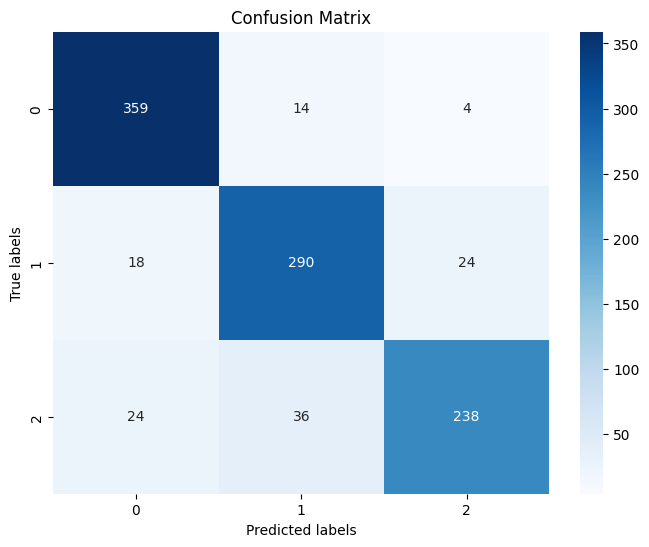

In [34]:
# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a K-Nearest Neighbors classifier
knn_classifier = KNeighborsClassifier()

# Train the classifier
knn_classifier.fit(X_train, y_train)

# Predict on the test set
y_pred = knn_classifier.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Display classification report
print("Classification Report:")
print(classification_report(y_test, y_pred))

# Generate confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Display confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, cmap='Blues', fmt='d')
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
plt.show()

In [35]:
y_pred = knn_classifier.predict(X_train)
accuracy = accuracy_score(y_train, y_pred)
print("Accuracy:", accuracy)


Accuracy: 0.8989071038251366
